<a href="https://colab.research.google.com/github/pchamio/AI-conference-published-paper/blob/main/Data_Analyst_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analyst Exercise


Import all the libraries

In [1]:
# import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Load the given data

In [2]:
# load movies_budgets data
movies_budgets = pd.read_csv('movies_budgets.csv')
movies_budgets.rename(columns={'Unnamed: 0':'ID'},inplace=True)
movies_budgets.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors
0,0,Joker,1.252633e+07,62,122,2019,13
1,1,Parasite,9.034395e+07,80,132,2019,5
2,2,Knives Out,4.833149e+07,50,130,2019,12
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16
4,4,The Gentlemen,6.649767e+06,94,113,2019,9


In [3]:
# load movies_scores data
movies_scores = pd.read_csv('movies_scores.csv')
movies_scores.rename(columns={'Unnamed: 0':'ID'},inplace=True)
movies_scores.head()

,ID,movie,time_minute,year,vote,grade,directors
0,0,Joker,122,2019,808270,2.683119,168
1,1,Parasite,132,2019,426750,8.495495,527
2,2,Knives Out,130,2019,319809,6.045874,493
3,3,Once Upon a Time... in Hollywood,161,2019,478002,6.211508,534
4,4,The Gentlemen,113,2019,146955,1.742737,299


Explore dataset

In [4]:
movies_budgets.describe()

,ID,budget,num_employees,time_minute,year,num_actors
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,4.418983e+07,69.928000,122.250000,1991.013000,11.935000
std,288.819436,2.214552e+07,28.400059,27.871856,23.059587,4.434009
min,0.000000,3.439503e+05,20.000000,45.000000,1920.000000,5.000000
25%,249.750000,2.933318e+07,47.000000,102.000000,1976.000000,8.000000
50%,499.500000,4.152462e+07,69.000000,119.000000,1998.500000,12.000000
75%,749.250000,5.615621e+07,95.000000,136.000000,2009.000000,16.000000
max,999.000000,1.058777e+08,119.000000,321.000000,2019.000000,19.000000


In [5]:
movies_scores.describe()

,ID,time_minute,year,vote,grade,directors
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,122.250000,1991.013000,2.659911e+05,5.475654,269.067000
std,288.819436,27.871856,23.059587,3.144706e+05,1.724042,158.129363
min,0.000000,45.000000,1920.000000,2.518200e+04,0.014822,0.000000
25%,249.750000,102.000000,1976.000000,5.442525e+04,4.474390,134.000000
50%,499.500000,119.000000,1998.500000,1.368875e+05,5.500000,268.000000
75%,749.250000,136.000000,2009.000000,3.631140e+05,6.547221,401.250000
max,999.000000,321.000000,2019.000000,2.250445e+06,9.244838,549.000000


Both dataset have the same number of rows and id which expected to be unique. The column 'time_minute' and 'year' are also identical. It can be said that we can combine these two dataset with the three identical column: id, time_minute and year.

In [6]:
# merge two dataset
df_final = movies_budgets.merge(movies_scores, how='inner', left_on=['ID','movie','time_minute','year'], right_on=['ID','movie','time_minute','year'])
df_final.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors,vote,grade,directors
0,0,Joker,1.252633e+07,62,122,2019,13,808270,2.683119,168
1,1,Parasite,9.034395e+07,80,132,2019,5,426750,8.495495,527
2,2,Knives Out,4.833149e+07,50,130,2019,12,319809,6.045874,493
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16,478002,6.211508,534
4,4,The Gentlemen,6.649767e+06,94,113,2019,9,146955,1.742737,299


Check again

In [7]:
df_final.describe()

,ID,budget,num_employees,time_minute,year,num_actors,vote,grade,directors
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,4.418983e+07,69.928000,122.250000,1991.013000,11.935000,2.659911e+05,5.475654,269.067000
std,288.819436,2.214552e+07,28.400059,27.871856,23.059587,4.434009,3.144706e+05,1.724042,158.129363
min,0.000000,3.439503e+05,20.000000,45.000000,1920.000000,5.000000,2.518200e+04,0.014822,0.000000
25%,249.750000,2.933318e+07,47.000000,102.000000,1976.000000,8.000000,5.442525e+04,4.474390,134.000000
50%,499.500000,4.152462e+07,69.000000,119.000000,1998.500000,12.000000,1.368875e+05,5.500000,268.000000
75%,749.250000,5.615621e+07,95.000000,136.000000,2009.000000,16.000000,3.631140e+05,6.547221,401.250000
max,999.000000,1.058777e+08,119.000000,321.000000,2019.000000,19.000000,2.250445e+06,9.244838,549.000000


## 1. Quality of movies per time window

a. Which year was the year with the best movies (taking all movies into account that year).

In [8]:
q1_a = df_final.groupby(['year']).agg({'vote': 'max'}).sort_values(['vote'],ascending=False).head(1)
q1_a = q1_a.reset_index()
q1_a = q1_a[['year']]
q1_a

,year
0,1994


b. Please provide a sorted list of all the years by their quality and top 5.

In [9]:
q1_b = df_final.groupby(['year']).apply(lambda x: x.sort_values(["vote"], ascending = False)).reset_index(drop=True)
q1_b = q1_b.groupby('year').head(5)[['year','vote']]
q1_b

,year,vote
0,1920,54740
1,1921,107098
2,1922,85719
3,1924,38560
4,1925,95859
...,...,...
978,2019,808270
979,2019,727950
980,2019,478002
981,2019,426750


c. Which decade was the best?

In [10]:
df_final['decade'] = np.ceil(df_final['year']/10)
q1_c = df_final.groupby(['decade']).agg({'vote': 'max'}).sort_values(['vote'],ascending=False).head(1)
q1_c = q1_c.reset_index()
q1_c = q1_c[['decade']]
q1_c

,decade
0,200.0


## 2. Directors

a. Find top 5 directors who directed the best quality movies (by their movie grades).

In [11]:
q2_a = df_final.groupby(['directors']).agg({'grade': 'max'}).sort_values(['grade'],ascending=False).head(5)
q2_a = q2_a.reset_index()
q2_a

,directors,grade
0,17,9.244838
1,124,9.244838
2,392,9.244838
3,6,9.244838
4,395,9.244838


The top 5 directors are

In [12]:
top5_directors = q2_a[['directors']]
top5_directors

,directors
0,17
1,124
2,392
3,6
4,395


The average grade of all movies is

In [13]:
grade_mean = df_final['grade'].mean()
grade_mean

5.475653883764269

b. Choose 2 or 3 of them as options that you would recommend to work with, why did you choose those?

In [14]:
q2_b = df_final.groupby(['directors']).agg({'grade': ['max','mean','min']})
q2_b = q2_b['grade'][['min']].reset_index()
q2_b = q2_b[q2_b['min'] > grade_mean]
q2_b = q2_b.merge(top5_directors, how='inner', left_on=['directors'], right_on=['directors'])
q2_b

,directors,min
0,17,9.244838
1,124,8.495495
2,395,5.558019


I would recommend the directors 17, 124 and 395 as three of them never produce movies that is lower than average grade and their minimum grade is also higher while the rest two directors have lower than average garde movies.

## 3. Budget and profits

Load the budget table.

In general, would you say a lot of employees correlate significantly to more expensive (cost of creating a movie = budget) movies (no need for deep analysis, just an explanation/graph would be enough).


In [15]:
df_final.head()

,ID,movie,budget,num_employees,time_minute,year,num_actors,vote,grade,directors,decade
0,0,Joker,1.252633e+07,62,122,2019,13,808270,2.683119,168,202.0
1,1,Parasite,9.034395e+07,80,132,2019,5,426750,8.495495,527,202.0
2,2,Knives Out,4.833149e+07,50,130,2019,12,319809,6.045874,493,202.0
3,3,Once Upon a Time... in Hollywood,5.024064e+07,89,161,2019,16,478002,6.211508,534,202.0
4,4,The Gentlemen,6.649767e+06,94,113,2019,9,146955,1.742737,299,202.0


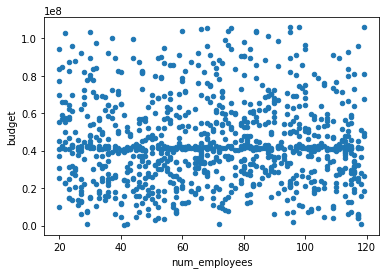

In [16]:
# Scatterplot
df_final.plot.scatter('num_employees','budget')

In general the more number of employee might lead to higher cost, however, acording to the scatter, the lower number of employee could also lead to higher cost. Therefore, the correlation between number of employee and budget is not strong. 
There is a trend on the straight line that the budget is around 0.4 for most of the movies, while the number of employee varies across the dataset.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


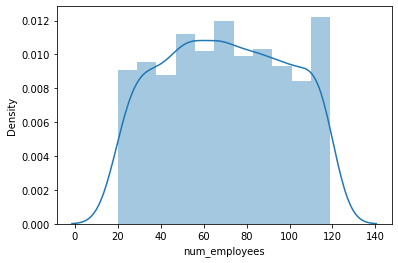

In [17]:
# Histogram
sns.distplot(df_final['num_employees']) 
plt.show()

The number of employee distributed equally.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


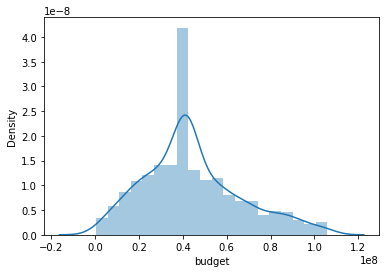

In [18]:
sns.distplot(df_final['budget']) 
plt.show()

There is a peak thhat most of the movies use budget at 0.4. We can see this as the minimum budget needed for a movie.

Assuming it is possible to create a movie with an imaginary grade of 12, how much would it cost to create such a movie? (here you should learn from the existing data).

In [19]:
# build linear regression to predict movie grade 12
# predictor X
X = [[x] for x in df_final['grade'].values]
# Y
y = [[x] for x in df_final['budget'].values]
# fit linear regression 
reg = LinearRegression().fit(X, y)

# suppose we want to predict movie grade 12
grade = 12

# the predicted cost of movie
grade12_cost = reg.predict(np.array([[grade]]))[0].item()
grade12_cost

125304756.50752899

Assuming grades determine the income (amount of sales/revenue) from a movie by the following function: a0 = -300000 a1 = 3500000 a2 = 900000

income\ =\ a0\ +\ a1\ \ast grades\ +\ a2\ \ast\ grade{s^}^2\

What budget would you choose to make a movie if you want investors to be happy? (assuming investors care about profit, profit)

In [20]:
# assuming income for a movie follow this formula with the following parameter
a0 = -300000
a1 = 3500000
a2 = 900000

# predicted income
income = a0 + a1 * grade + a2 * grade**2
income

171300000

The predicted profit for grade 12 movie

In [21]:
profit = income - grade12_cost 
profit

45995243.49247101

The expected profit is positive as the expected income of grade 12 movie is higher than cost(budget). We can choose the budget 10% higher than the expected one to control uncertain circumstance and return the rest of the budget incase there are some left to make investor happy.

# Data Engineering - Bonus Exercise 

In [23]:
import requests
from bs4 import BeautifulSoup
url = "http://www.imdb.com/chart/top"
response = requests.get(url).text
soup = BeautifulSoup(response, 'html.parser')
template = 'https://www.imdb.com%s'
title_links = [template % a.attrs.get('href') for a in soup.select( 'td.titleColumn a' )]